# Hyperparameter Tuning and Pruning in Decision Trees - Lab

## Introduction

In this lab, you will use the titanic dataset to see the impact of tree pruning and hyperparameter tuning on the predictive performance of a decision tree classifier. Pruning reduces the size of decision trees by removing nodes of the tree that do not provide much predictive power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood. 

## Objectives

In this lab you will: 

- Determine the optimal hyperparameters for a decision tree model and evaluate the model performance

## Import necessary libraries

Let's first import the libraries you'll need for this lab. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn')

## Import the data

The titanic dataset, available in `'titanic.csv'`, is all cleaned up and preprocessed for you so that you can focus on pruning and optimization. Import the dataset and print the first five rows of the data: 

In [2]:
# Import the data
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,1
3,4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,1
4,5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


## Create training and test sets

- Assign the `'Survived'` column to `y` 
- Drop the `'Survived'` and `'PassengerId'` columns from `df`, and assign the resulting DataFrame to `X` 
- Split `X` and `y` into training and test sets. Assign 30% to the test set and set the `random_state` to `SEED` 

In [3]:
# Create X and y 
y = df[['Survived']]
X = df.drop(columns=['PassengerId', 'Survived'])

# Split into training and test sets
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## Train a vanilla classifier

__Note:__ The term "vanilla" is used for a machine learning algorithm with its default settings (no tweaking/tuning).

- Instantiate a decision tree 
  - Use the `'entropy'` criterion and set the `random_state` to `SEED` 
- Fit this classifier to the training data 

In [4]:
# Train the classifier using training data
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

## Make predictions 
- Create a set of predictions using the test set 
- Using `y_test` and `y_pred`, calculate the AUC (Area under the curve) to check the predictive performance

In [5]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7367718101733446

## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree: 

- Create an array for `max_depth` values ranging from 1 - 32  
- In a loop, train the classifier for each depth value (32 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results 

In [6]:
print(list(range(1,33)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


In [7]:
# Identify the optimal tree depth for given data
depth_values = np.asarray(list(range(1, 33)))
train_auc = []
test_auc = []
for i in depth_values:
    dtc = DecisionTreeClassifier(criterion='entropy', random_state=SEED, max_depth=i)
    dtc.fit(X_train, y_train)
    y_test_pred = dtc.predict(X_test)
    fpr_test, tpr_test, thresh_test= roc_curve(y_test, y_test_pred)
    test_auc.append(auc(fpr_test, tpr_test))
    y_train_pred = dtc.predict(X_train)
    fpr_train, tpr_train, thresh_train= roc_curve(y_train, y_train_pred)
    train_auc.append(auc(fpr_train, tpr_train))  

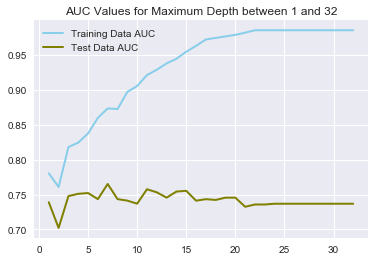

In [8]:
# You observations here 
plt.plot(depth_values, train_auc, marker='', color='skyblue', linewidth=2, label='Training Data AUC', )
plt.plot(depth_values, test_auc, marker='', color='olive', linewidth=2, label='Test Data AUC')
plt.title('AUC Values for Maximum Depth between 1 and 32')
plt.legend()
plt.show()

There is clear overfitting here, with a high jump in AUC value for our training sample, with no improvement in the predicted values of y past a maximum depth of 4.

## Minimum Sample Split

Now check for the best `min_samples_splits` parameter for our decision tree 

- Create an array for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

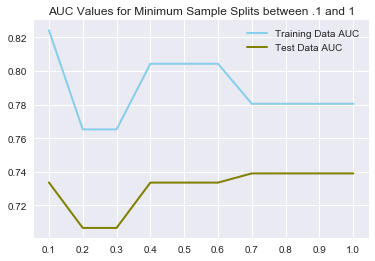

In [9]:
# Identify the optimal min-samples-split for given data
min_sample_splits = np.linspace(.1, 1, 10)
train_auc = []
test_auc = []
for i in min_sample_splits:
    dtc = DecisionTreeClassifier(criterion='entropy', random_state=SEED, min_samples_split=i)
    dtc.fit(X_train, y_train)
    y_test_pred = dtc.predict(X_test)
    fpr_test, tpr_test, thresh_test= roc_curve(y_test, y_test_pred)
    test_auc.append(auc(fpr_test, tpr_test))
    y_train_pred = dtc.predict(X_train)
    fpr_train, tpr_train, thresh_train= roc_curve(y_train, y_train_pred)
    train_auc.append(auc(fpr_train, tpr_train))  
    
plt.plot(min_sample_splits, train_auc, marker='', color='skyblue', linewidth=2, label='Training Data AUC', )
plt.plot(min_sample_splits, test_auc, marker='', color='olive', linewidth=2, label='Test Data AUC')
plt.title('AUC Values for Minimum Sample Splits between .1 and 1')
plt.xticks(min_sample_splits)
plt.legend()
plt.show()

The AUC for both our test and training data plateaus at around .7.

## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree 

- Create an array for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

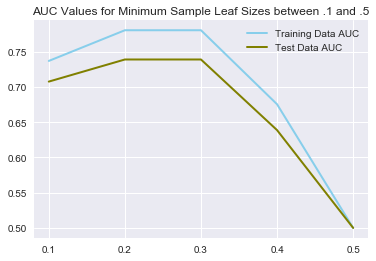

In [10]:
# Calculate the optimal value for minimum sample leafs
# Identify the optimal min-samples-split for given data
min_sample_leaf_size = np.linspace(.1, .5, 5)
train_auc = []
test_auc = []
for i in min_sample_leaf_size:
    dtc = DecisionTreeClassifier(criterion='entropy', random_state=SEED, min_samples_leaf=i)
    dtc.fit(X_train, y_train)
    y_test_pred = dtc.predict(X_test)
    fpr_test, tpr_test, thresh_test= roc_curve(y_test, y_test_pred)
    test_auc.append(auc(fpr_test, tpr_test))
    y_train_pred = dtc.predict(X_train)
    fpr_train, tpr_train, thresh_train= roc_curve(y_train, y_train_pred)
    train_auc.append(auc(fpr_train, tpr_train))  
    
plt.plot(min_sample_leaf_size, train_auc, marker='', color='skyblue', linewidth=2, label='Training Data AUC', )
plt.plot(min_sample_leaf_size, test_auc, marker='', color='olive', linewidth=2, label='Test Data AUC')
plt.title('AUC Values for Minimum Sample Leaf Sizes between .1 and .5')
plt.xticks(min_sample_leaf_size)
plt.legend()
plt.show()

The AUC value for our minimum leaf sample size at .3 is the best performing and most stable for both our testing and training samples.

## Maximum Features

Now check for the best `max_features` parameter value for our decision tree 

- Create an array for `max_features` values ranging from 1 - 12 (1 feature vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

In [12]:
list(range(1, 13))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

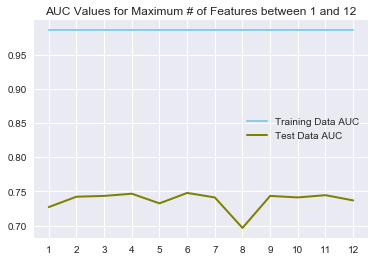

In [13]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, 13))
train_auc = []
test_auc = []
for i in max_features:
    dtc = DecisionTreeClassifier(criterion='entropy', random_state=SEED, max_features=i)
    dtc.fit(X_train, y_train)
    y_test_pred = dtc.predict(X_test)
    fpr_test, tpr_test, thresh_test= roc_curve(y_test, y_test_pred)
    test_auc.append(auc(fpr_test, tpr_test))
    y_train_pred = dtc.predict(X_train)
    fpr_train, tpr_train, thresh_train= roc_curve(y_train, y_train_pred)
    train_auc.append(auc(fpr_train, tpr_train))  
    
plt.plot(max_features, train_auc, marker='', color='skyblue', linewidth=2, label='Training Data AUC', )
plt.plot(max_features, test_auc, marker='', color='olive', linewidth=2, label='Test Data AUC')
plt.title('AUC Values for Maximum # of Features between 1 and 12')
plt.xticks(max_features)
plt.legend()
plt.show()

Surprisingly, there is a high AUC for all values of the number of features being included in our training data set. For our test AUCs, performance does not improve beyong 6 features.

## Re-train the classifier with chosen values

Now we will use the best values from each training phase above and feed it back to our classifier. Then we can see if there is any improvement in predictive performance. 

- Train the classifier with the optimal values identified 
- Compare the AUC of the new model with the earlier vanilla decision tree AUC 
- Interpret the results of the comparison

In [19]:
# Train a classifier with optimal values identified above

dtc_final = DecisionTreeClassifier(criterion='entropy', random_state=SEED,\
                                   max_features=6, max_depth=4,\
                                   min_samples_split=.7, min_samples_leaf=.2)
dtc_final.fit(X_train, y_train)

y_test_pred = dtc_final.predict(X_test)
fpr_test, tpr_test, thresh_test= roc_curve(y_test, y_test_pred)
print('The Test Data AUC is ' + str(auc(fpr_test, tpr_test)))

y_train_pred = dtc_final.predict(X_train)
fpr_train, tpr_train, thresh_train= roc_curve(y_train, y_train_pred)
print('The Train Data AUC is ' + str(auc(fpr_train, tpr_train)))

The Test Data AUC is 0.6387325944870701
The Train Data AUC is 0.6754160548213411


Our model including the hyperparameters is actually performing worse than a vanilla classifier.

In the next section, we shall talk about hyperparameter tuning using a technique called "grid-search" to make this process even more granular and decisive. 

## Summary 

In this lesson, we looked at tuning a decision tree classifier in order to avoid overfitting and increasing the generalization capabilities of the classifier. For the titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 